## Week 10 In-Class Activity

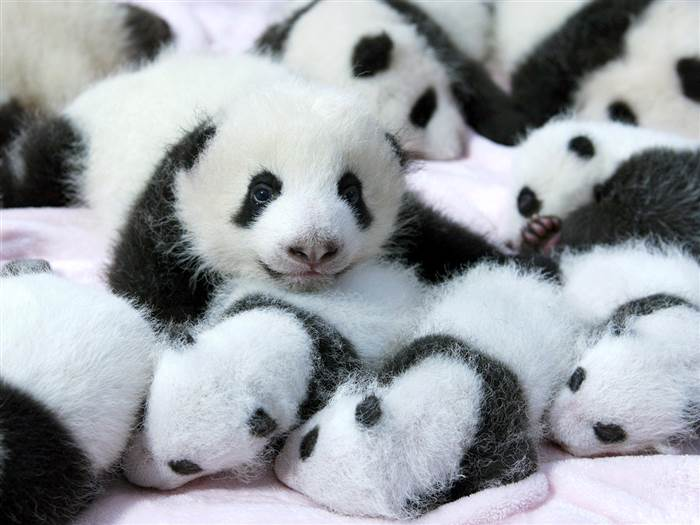

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np

Image("pile_of_pandas.png", width = 300)

## Indexing Tips

Indexing in Pandas is confusing - especially when you have integer indices

In [2]:
X = pd.DataFrame(np.arange(25).reshape((5,5)), 
                 index = ['First', 'Second', 'Third', 'Fourth', 'Fifth'], 
                 columns = ['A', 'B', 'C', 'D', 'E'])
X

A   B   C   D   E
First    0   1   2   3   4
Second   5   6   7   8   9
Third   10  11  12  13  14
Fourth  15  16  17  18  19
Fifth   20  21  22  23  24

How do you get the 17?

We **strongly** recommend that you learn two indexing methods: loc and iloc.

loc uses labels, iloc uses index position. These are usually all you need.

Do not use ix, which sometimes uses labels and sometimes positions.

In [3]:
X.loc['Fourth','C']

17

In [4]:
X.iloc[3,2]

17

How would you get the 12, 13, and 18?

In [5]:
X.loc['Third','C']

12

In [8]:
X.iloc[2,2]

12

In [6]:
X.loc['Third','D']

13

In [9]:
X.iloc[2,3]

13

In [7]:
X.loc['Fourth','D']

18

In [10]:
X.iloc[3,3]

18

## Pandas Cheat Sheet

Some of the most common commands you may want to use today:

#### Pandas

- .read_csv

#### Series

- .value_counts()
- .describe()
- .plot()
- .sort_values()

#### DataFrame

- .shape
- .index
- .columns
- .loc[row labels, column labels]
- .iloc[rows, columns]
- ['column name']
- .drop()
- .set_index()
- .sort_values(by = 'column name')
- .groupby()

#### Groupby

- .agg()

## We're going to Vegas!



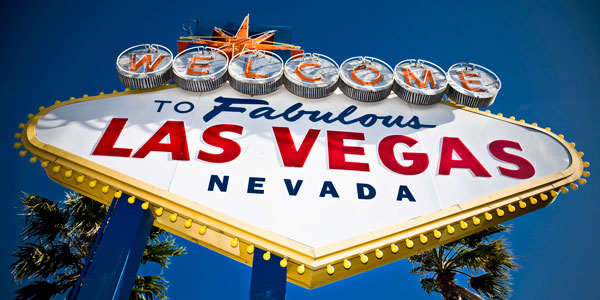

In [11]:
Image("welcome_vegas.jpg", width = 500)

In [12]:
pd.options.display.float_format = '{:,.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline

The file `vegas.csv` contains data taken from trip adviser reviews in 2015.  It was used in a paper, 

- Moro, S., Rita, P., & Coelho, J. (2017). Stripping customers' feedback on hotels through data mining: The case of Las Vegas Strip. Tourism Management Perspectives, 23, 41-52.

You have been hired by Circus Circus - that's right!  that venerable icon of tasteful luxury! - to plan the next season of promotions.  In particular, the hotel is interested in questions like,

- What customer segment shows the potential for growing their market?
- What types of promotions are most likely to attract customers?
- In the longer term, what investments are likely to be most profitable for the hotel?

Here are two ways to access the data.  You can download from the UC Irvine Machine Learning Repository.  If you set your working directory correctly to the Google Drive folder, you can access it from there.

In [13]:
Vegas = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00397/LasVegasTripAdvisorReviews-Dataset.csv', delimiter=';')

In [ ]:
# Vegas = pd.read_csv('vegas.csv', delimiter=';')

### Data Orientation

First, answer some very basic questions about the data: 
- How many rows and how many columns are there?
- Did the variable names read from the csv correctly?
- Does the Index make sense?  Are there extra indexing variables?

In [14]:
Vegas.shape

(504, 20)

In [15]:
Vegas.head()

User country  Nr. reviews  Nr. hotel reviews  Helpful votes  Score  \
0          USA           11                  4             13      5   
1          USA          119                 21             75      3   
2          USA           36                  9             25      5   
3           UK           14                  7             14      4   
4       Canada            5                  5              2      4   

  Period of stay Traveler type Pool  Gym Tennis court Spa Casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  Free internet                              Hotel name Hotel stars  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3   
1           YES  Circus Circus Hotel & Casino Las Vegas           3   
2           YES  Circus Circus Hotel & Casino Las Vegas           3   
3           YES  Circus Circus Hotel & Casino Las Vegas           3   
4           YES  Circus Circus Hotel & Casino Las Vegas           3   

   Nr. rooms User continent  Member years Review month Review weekday  
0       3773  North America             9      January       Thursday  
1       3773  North America             3      January         Friday  
2       3773  North America             2     February       Saturday  
3       3773         Europe             6     February         Friday  
4       3773  North America             7        March        Tuesday

Say you found "extra" index variables after reading in the data.  That might look like this:

In [16]:
Vegas2 = Vegas.assign(extra_index = pd.Series(range(Vegas.shape[0])))
Vegas2.head()

User country  Nr. reviews  Nr. hotel reviews  Helpful votes  Score  \
0          USA           11                  4             13      5   
1          USA          119                 21             75      3   
2          USA           36                  9             25      5   
3           UK           14                  7             14      4   
4       Canada            5                  5              2      4   

  Period of stay Traveler type Pool  Gym Tennis court  ... Casino  \
0        Dec-Feb       Friends   NO  YES           NO  ...    YES   
1        Dec-Feb      Business   NO  YES           NO  ...    YES   
2        Mar-May      Families   NO  YES           NO  ...    YES   
3        Mar-May       Friends   NO  YES           NO  ...    YES   
4        Mar-May          Solo   NO  YES           NO  ...    YES   

  Free internet                              Hotel name Hotel stars Nr. rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
2           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
3           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
4           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

   User continent Member years  Review month Review weekday extra_index  
0   North America            9       January       Thursday           0  
1   North America            3       January         Friday           1  
2   North America            2      February       Saturday           2  
3          Europe            6      February         Friday           3  
4   North America            7         March        Tuesday           4  

[5 rows x 21 columns]

Option 1: set the index to the extra variable.

In [17]:
Vegas2.set_index("extra_index").head()

User country  Nr. reviews  Nr. hotel reviews  Helpful votes  \
extra_index                                                               
0                    USA           11                  4             13   
1                    USA          119                 21             75   
2                    USA           36                  9             25   
3                     UK           14                  7             14   
4                 Canada            5                  5              2   

             Score Period of stay Traveler type Pool  Gym Tennis court Spa  \
extra_index                                                                  
0                5        Dec-Feb       Friends   NO  YES           NO  NO   
1                3        Dec-Feb      Business   NO  YES           NO  NO   
2                5        Mar-May      Families   NO  YES           NO  NO   
3                4        Mar-May       Friends   NO  YES           NO  NO   
4                4        Mar-May          Solo   NO  YES           NO  NO   

            Casino Free internet                              Hotel name  \
extra_index                                                                
0              YES           YES  Circus Circus Hotel & Casino Las Vegas   
1              YES           YES  Circus Circus Hotel & Casino Las Vegas   
2              YES           YES  Circus Circus Hotel & Casino Las Vegas   
3              YES           YES  Circus Circus Hotel & Casino Las Vegas   
4              YES           YES  Circus Circus Hotel & Casino Las Vegas   

            Hotel stars  Nr. rooms User continent  Member years Review month  \
extra_index                                                                    
0                     3       3773  North America             9      January   
1                     3       3773  North America             3      January   
2                     3       3773  North America             2     February   
3                     3       3773         Europe             6     February   
4                     3       3773  North America             7        March   

            Review weekday  
extra_index                 
0                 Thursday  
1                   Friday  
2                 Saturday  
3                   Friday  
4                  Tuesday

Option 2: drop the extra variable.

In [18]:
Vegas2.drop('extra_index', axis=1).head()

User country  Nr. reviews  Nr. hotel reviews  Helpful votes  Score  \
0          USA           11                  4             13      5   
1          USA          119                 21             75      3   
2          USA           36                  9             25      5   
3           UK           14                  7             14      4   
4       Canada            5                  5              2      4   

  Period of stay Traveler type Pool  Gym Tennis court Spa Casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  Free internet                              Hotel name Hotel stars  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3   
1           YES  Circus Circus Hotel & Casino Las Vegas           3   
2           YES  Circus Circus Hotel & Casino Las Vegas           3   
3           YES  Circus Circus Hotel & Casino Las Vegas           3   
4           YES  Circus Circus Hotel & Casino Las Vegas           3   

   Nr. rooms User continent  Member years Review month Review weekday  
0       3773  North America             9      January       Thursday  
1       3773  North America             3      January         Friday  
2       3773  North America             2     February       Saturday  
3       3773         Europe             6     February         Friday  
4       3773  North America             7        March        Tuesday

## Fixing Column Names

To make the code cleaner, it will be nice not to have spaces in the column names.  This is probably easiest to do with some regular expressions.  I'll also go all lowercase.

In [19]:
Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.strip('.').str.lower()
Vegas.head()

<ipython-input-19-43d9b2c5be60>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  Vegas.columns = Vegas.columns.str.replace('\.*\s+', '_').str.strip('.').str.lower()


user_country  nr_reviews  nr_hotel_reviews  helpful_votes  score  \
0          USA          11                 4             13      5   
1          USA         119                21             75      3   
2          USA          36                 9             25      5   
3           UK          14                 7             14      4   
4       Canada           5                 5              2      4   

  period_of_stay traveler_type pool  gym tennis_court spa casino  \
0        Dec-Feb       Friends   NO  YES           NO  NO    YES   
1        Dec-Feb      Business   NO  YES           NO  NO    YES   
2        Mar-May      Families   NO  YES           NO  NO    YES   
3        Mar-May       Friends   NO  YES           NO  NO    YES   
4        Mar-May          Solo   NO  YES           NO  NO    YES   

  free_internet                              hotel_name hotel_stars  nr_rooms  \
0           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
1           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
2           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
3           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   
4           YES  Circus Circus Hotel & Casino Las Vegas           3      3773   

  user_continent  member_years review_month review_weekday  
0  North America             9      January       Thursday  
1  North America             3      January         Friday  
2  North America             2     February       Saturday  
3         Europe             6     February         Friday  
4  North America             7        March        Tuesday

Now we can access columns as attributes with the dot notation as shown below:

In [ ]:
Vegas.period_of_stay.value_counts()

## Customer Overview

Let's learn about the customers overall.  
- Where are they from?  (user_country column)

In [20]:
Vegas.user_country.value_counts().head(20)

USA            217
UK              72
Canada          65
Australia       36
Ireland         13
India           11
Mexico           8
Germany          7
Egypt            5
Brazil           5
New Zeland       5
Singapore        4
Netherlands      4
Norway           3
Israel           3
Malaysia         3
Hawaii           3
Thailand         3
Finland          3
Spain            2
Name: user_country, dtype: int64

- What kind of travelers are they? (traveler_type column)

In [21]:
Vegas.traveler_type.value_counts()

Couples     214
Families    110
Friends      82
Business     74
Solo         24
Name: traveler_type, dtype: int64

<AxesSubplot:>

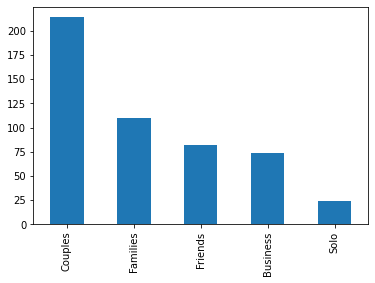

In [22]:
Vegas.traveler_type.value_counts().plot(kind='bar')

- When did they stay in Vegas? (? column)

In [24]:
Vegas.review_month.value_counts()

January      42
February     42
March        42
April        42
May          42
June         42
July         42
August       42
September    42
October      42
November     42
December     42
Name: review_month, dtype: int64

In [25]:
Vegas.review_weekday.value_counts()

Wednesday    85
Tuesday      80
Sunday       77
Monday       74
Friday       65
Thursday     62
Saturday     61
Name: review_weekday, dtype: int64

- Which hotels did they stay in? (? column)

In [23]:
Vegas.hotel_name.value_counts()

Circus Circus Hotel & Casino Las Vegas                 24
Encore at wynn Las Vegas                               24
Paris Las Vegas                                        24
Bellagio Las Vegas                                     24
The Venetian Las Vegas Hotel                           24
Wyndham Grand Desert                                   24
Hilton Grand Vacations at the Flamingo                 24
Tuscany Las Vegas Suites & Casino                      24
Marriott's Grand Chateau                               24
Hilton Grand Vacations on the Boulevard                24
The Cromwell                                           24
Excalibur Hotel & Casino                               24
Trump International Hotel Las Vegas                    24
Wynn Las Vegas                                         24
The Palazzo Resort Hotel Casino                        24
The Cosmopolitan Las Vegas                             24
Caesars Palace                                         24
Tropicana Las 

## What about the customers of Circus Circus?

Check to see what kind of travelers stay in Circus Circus, and how they compare to travelers overall.

<AxesSubplot:>

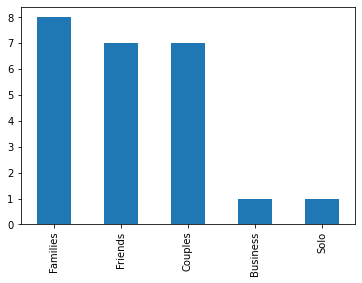

In [26]:
Vegas[Vegas.hotel_name == 'Circus Circus Hotel & Casino Las Vegas'].traveler_type.value_counts().plot(kind='bar')

## Comparing Hotels

Let's get some info about how Circus Circus compares to other hotels.  We'll need to use some groupby's.  First, what is the average review score for each hotel?

In [27]:
Vegas.groupby('hotel_name').score.mean().sort_values()

hotel_name
Circus Circus Hotel & Casino Las Vegas                3.21
Monte Carlo Resort&Casino                             3.29
Excalibur Hotel & Casino                              3.71
The Westin las Vegas Hotel Casino & Spa               3.92
Hilton Grand Vacations at the Flamingo                3.96
Treasure Island- TI Hotel & Casino                    3.96
Tropicana Las Vegas - A Double Tree by Hilton Hotel   4.04
Paris Las Vegas                                       4.04
The Cromwell                                          4.08
Caesars Palace                                        4.12
Hilton Grand Vacations on the Boulevard               4.17
Bellagio Las Vegas                                    4.21
Tuscany Las Vegas Suites & Casino                     4.21
The Cosmopolitan Las Vegas                            4.25
The Palazzo Resort Hotel Casino                       4.38
Wyndham Grand Desert                                  4.38
Trump International Hotel Las Vegas          

Another way to do that which is pretty transparent:

In [28]:
Vegas.score.groupby(Vegas.hotel_name).mean()

hotel_name
Bellagio Las Vegas                                    4.21
Caesars Palace                                        4.12
Circus Circus Hotel & Casino Las Vegas                3.21
Encore at wynn Las Vegas                              4.54
Excalibur Hotel & Casino                              3.71
Hilton Grand Vacations at the Flamingo                3.96
Hilton Grand Vacations on the Boulevard               4.17
Marriott's Grand Chateau                              4.54
Monte Carlo Resort&Casino                             3.29
Paris Las Vegas                                       4.04
The Cosmopolitan Las Vegas                            4.25
The Cromwell                                          4.08
The Palazzo Resort Hotel Casino                       4.38
The Venetian Las Vegas Hotel                          4.58
The Westin las Vegas Hotel Casino & Spa               3.92
Treasure Island- TI Hotel & Casino                    3.96
Tropicana Las Vegas - A Double Tree by Hilton

## Breakout Activity: What customers like Circus-Circus the most?

Use groupby operations to figure out what types of travelers give circus-circus the highest score.

In [29]:
Vegas[Vegas.hotel_name == "Circus Circus Hotel & Casino Las Vegas"].groupby('traveler_type').score.mean()

traveler_type
Business   3.00
Couples    2.71
Families   3.38
Friends    3.43
Solo       4.00
Name: score, dtype: float64

What country gives Circus-Circus the highest score?

In [30]:
Vegas[Vegas.hotel_name == "Circus Circus Hotel & Casino Las Vegas"].groupby('user_country').score.mean()

user_country
Australia    3.00
Canada       2.80
India        4.00
New Zeland   2.50
UK           3.80
USA          3.20
Name: score, dtype: float64

## What's driving the scores of Circus-Circus?

We want a hotel-level dataframe to hold the attributes of each hotel.  We can do this with a groupby, followed by an aggregate.  However, we need to apply different functions to different columns.  We can do this by passing in a dictionary.

In [31]:
first_f = lambda x: x.iloc[0]
f = {'score': np.mean,
    'pool': first_f,
    'gym': first_f,
    'tennis_court': first_f,
    'spa': first_f,
    'casino': first_f,
    'free_internet': first_f}

In [32]:
hotel_df = Vegas.groupby(Vegas.hotel_name).agg(f)
hotel_df

score pool  gym  \
hotel_name                                                            
Bellagio Las Vegas                                   4.21  YES  YES   
Caesars Palace                                       4.12  YES  YES   
Circus Circus Hotel & Casino Las Vegas               3.21   NO  YES   
Encore at wynn Las Vegas                             4.54  YES  YES   
Excalibur Hotel & Casino                             3.71  YES  YES   
Hilton Grand Vacations at the Flamingo               3.96  YES  YES   
Hilton Grand Vacations on the Boulevard              4.17  YES  YES   
Marriott's Grand Chateau                             4.54  YES  YES   
Monte Carlo Resort&Casino                            3.29  YES  YES   
Paris Las Vegas                                      4.04  YES  YES   
The Cosmopolitan Las Vegas                           4.25  YES  YES   
The Cromwell                                         4.08  YES   NO   
The Palazzo Resort Hotel Casino                      4.38  YES  YES   
The Venetian Las Vegas Hotel                         4.58  YES  YES   
The Westin las Vegas Hotel Casino & Spa              3.92  YES  YES   
Treasure Island- TI Hotel & Casino                   3.96  YES  YES   
Tropicana Las Vegas - A Double Tree by Hilton H...   4.04  YES  YES   
Trump International Hotel Las Vegas                  4.38  YES  YES   
Tuscany Las Vegas Suites & Casino                    4.21  YES  YES   
Wyndham Grand Desert                                 4.38  YES  YES   
Wynn Las Vegas                                       4.62  YES  YES   

                                                   tennis_court  spa casino  \
hotel_name                                                                    
Bellagio Las Vegas                                           NO  YES    YES   
Caesars Palace                                               NO  YES    YES   
Circus Circus Hotel & Casino Las Vegas                       NO   NO    YES   
Encore at wynn Las Vegas                                     NO  YES    YES   
Excalibur Hotel & Casino                                     NO  YES    YES   
Hilton Grand Vacations at the Flamingo                       NO   NO     NO   
Hilton Grand Vacations on the Boulevard                      NO  YES    YES   
Marriott's Grand Chateau                                     NO   NO    YES   
Monte Carlo Resort&Casino                                    NO  YES    YES   
Paris Las Vegas                                              NO  YES    YES   
The Cosmopolitan Las Vegas                                   NO  YES    YES   
The Cromwell                                                 NO   NO    YES   
The Palazzo Resort Hotel Casino                              NO  YES    YES   
The Venetian Las Vegas Hotel                                 NO  YES    YES   
The Westin las Vegas Hotel Casino & Spa                      NO  YES    YES   
Treasure Island- TI Hotel & Casino                          YES  YES    YES   
Tropicana Las Vegas - A Double Tree by Hilton H...          YES  YES    YES   
Trump International Hotel Las Vegas                          NO  YES    YES   
Tuscany Las Vegas Suites & Casino                           YES  YES    YES   
Wyndham Grand Desert                                        YES   NO     NO   
Wynn Las Vegas                                              YES  YES    YES   

                                                   free_internet  
hotel_name                                                        
Bellagio Las Vegas                                           YES  
Caesars Palace                                               YES  
Circus Circus Hotel & Casino Las Vegas                       YES  
Encore at wynn Las Vegas                                     YES  
Excalibur Hotel & Casino                                     YES  
Hilton Grand Vacations at the Flamingo                       YES  
Hilton Grand Vacations on the Boulevard                      YES

## Optional Activity: What do Couples care about?

In your group, choose some upgrade that Circus-Circus could consider (for example, adding a pool).  Then look at travelers that are couples specifically, and see if there's evidence that they value that attribute.

If you succeed and have time, you could try to generate a table that indicates how much different types of travelers value different hotel attributes.